#### Naive Bayesian Classifier

- 초기에 빠르게 사용 가능
- 조건부 확률 사용..
- n개의 특성 / k개의 클래스
- 특성간에 서로 영향을 주지 않는다고 가정함 독립!
- 최대 확률을 갖는 클래스 선택

통계

>- 테스트 데이터에 대해 판별을 위해 확률적 기법 사용
>- 확률로 어느 카테고리에 속하는가 결정

>- 평균, 분산, 표준 편차, 공분산, 상관계수

> ...조건부 확률!
>- p[b|a] = p[a⋂b]p[a]
>- 사전확률 = p[w] , 우도 = p[x|w] , 사후확률 = p[w|x]
>- 사후확률 = 사전확률 * 우도

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import mglearn

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/NanumBarunGothic.ttf').get_name()
rc('font',family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False 

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

#iris data 로드 후 훈련/테스트로 나눔
iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target, random_state=0)

#가우시안 네이브 베이스를 훈련 데이터로 훈련
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
nErrors = (y_test != y_pred).sum()  # 예측과 실제와의 틀린 것 카운트
accuracy = 1.0 - nErrors/y_test.shape[0]  #정확도

#정확도 출력 ...
print("Accuracy = ", accuracy)
#print(classifier.score(X_test, y_test))
#print(np.mean(y_pred==y_test))

#테스트 샘플수와 오류수
print("Number of misabeled points out of a total : %d, points : %d "%(X_test.shape[0], nErrors))

Accuracy =  1.0
Number of misabeled points out of a total : 38, points : 0 


iris 데이터를 가우시안nb로 분류함

- test size = default
- 정확도는 1로 완벽 예측함.. 과대적합

In [4]:
accure = []
size = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.9]

for s in size:
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset.data, 
                            iris_dataset.target, random_state=0, test_size=s)
    classifier = GaussianNB().fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accure.append([classifier.score(X_test, y_test), (y_test!=y_pred).sum()])

df = pd.DataFrame(accure, index=size, columns=["Accuracy", "nErrors"])
display(df)

,Accuracy,nErrors
0.1,0.933333,1
0.2,0.966667,1
0.3,1.000000,0
0.4,0.933333,4
0.5,0.946667,4
0.6,0.944444,5
0.7,0.933333,7
0.9,0.948148,7


iris -  test size에 따른 정확도 결과

- 0.3일때 가장 정확함
- 0.6, 0.7보다 0.9일때 더 정확한 걸 보니까 데이터가 섞여있어서 미묘한 차이가 생기는 것 같음

In [5]:
#cancer data

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.target_names)
print("클래스별 샘플 수 : ", end='')
print(np.bincount(cancer.target),'\n')
    
for r in [0,21,42]:
    print("random state = ", r)
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                cancer.target, random_state=r)
    print(y_test)
    
    classifier = GaussianNB().fit(X_train, y_train) # 모델 생성

    print("훈련 세트 점수: {:.3f}".format(classifier.score(X_train, y_train)))
    print("테스트 세트 점수: {:.3f}".format(classifier.score(X_test, y_test)))
                                               
    rate = np.bincount(y_train)
    print('train rate = ',(rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')
    
    rate = np.bincount(y_test)
    print('test rate = ',(rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%\n')
    
## 원본 데이터와 클래스 비율 유지
print("\n stratify = y \n")
for r in [0,21,42]:
    print("random state = ", r)
    X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                cancer.target, random_state=r, stratify=cancer.target)
    print(y_test)

    classifier = GaussianNB().fit(X_train, y_train) # 모델 생성

    print("훈련 세트 점수: {:.3f}".format(classifier.score(X_train, y_train)))
    print("테스트 세트 점수: {:.3f}".format(classifier.score(X_test, y_test)))
    
    rate = np.bincount(y_train)
    print('train rate = ',(rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%')
    
    rate = np.bincount(y_test)
    print('test rate = ',(rate[0]*100//(rate[0]+rate[1])),'% :',(rate[1]*100//(rate[0]+rate[1])),'%\n')
    

['malignant' 'benign']
클래스별 샘플 수 : [212 357] 

random state =  0
[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0
 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0]
훈련 세트 점수: 0.951
테스트 세트 점수: 0.937
train rate =  37 % : 62 %
test rate =  37 % : 62 %

random state =  21
[1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 0
 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0
 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0]
훈련 세트 점수: 0.946
테스트 세트 점수: 0.923
train rate =  38 % : 61 %
test rate =  34 % : 65 %

random state =  42
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0

cancer data를 사용해서 분류를 해 보았음

>- 훈련 세트보다 테스트 세트에 대해 더 좋은 정확도를 가짐 = 42일때
>- 0, 21에서는 훈련 세트가 더 정확도가 높음

>- stratify = 비율 고정  일때
>- 전부 훈련 세트 점수가 높게 나왔음.

>- random state가 같고 결과적으로 나뉘어진 비율이 0과 41의 경우는 같은데 결과가 다른 이유는..
>- 나뉘어진 target 데이터를 보니까 서로 다름을 알 수 있음... 뭔가 다른 섞이는 작업이 들어가는걸까?

In [6]:
# knn과 logistic과 비교 - cancer데이터

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
logr = LogisticRegression(max_iter=3000).fit(X_train, y_train)

#knn분류기
print("knn")
print("훈련 세트 점수: {:.3f}".format(knn.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(knn.score(X_test, y_test)))

#로지스틱
print("\nlogistic")
print("훈련 세트 점수: {:.3f}".format(logr.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logr.score(X_test, y_test)))

knn
훈련 세트 점수: 0.951
테스트 세트 점수: 0.930

logistic
훈련 세트 점수: 0.958
테스트 세트 점수: 0.958


knn과 gaussianNB가 비슷하고 이들보다는 로지스틱회귀의 결과가 더 좋음

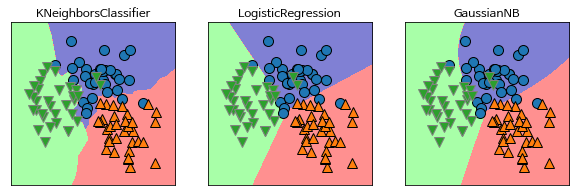

In [11]:
##위의 결과를 플롯으로

fig, axes = plt.subplots(1,3,figsize=(10,3))

for ax, model in zip(axes, [knn, logr, nb]):
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    mglearn.plots.plot_2d_classification(model, X, fill=True, alpha=.5, ax=ax)
    ax.set_title(model.__class__.__name__)

In [12]:
# make_blobs 데이터  0- sklearn의 
import sklearn
X, y =  sklearn.datasets.make_blobs(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

nb = GaussianNB().fit(X_train,y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
logr = LogisticRegression(max_iter=3000).fit(X_train, y_train)

#가우시안
print("Gaussian")
print("테스트 세트 점수: {:.3f}".format(nb.score(X_test, y_test)))

#knn분류기
print("\nknn")
print("테스트 세트 점수: {:.3f}".format(knn.score(X_test, y_test)))

#로지스틱
print("\nlogistic")
print("테스트 세트 점수: {:.3f}".format(logr.score(X_test, y_test)))


Gaussian
테스트 세트 점수: 0.840

knn
테스트 세트 점수: 0.920

logistic
테스트 세트 점수: 0.880


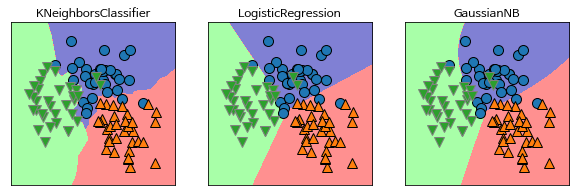

In [10]:
fig, axes = plt.subplots(1,3,figsize=(10,3))

for ax, model in zip(axes, [knn, logr, nb]):
    mglearn.discrete_scatter(X[:,0],X[:,1],y,ax=ax)
    mglearn.plots.plot_2d_classification(model, X, fill=True, alpha=.5, ax=ax)
    ax.set_title(model.__class__.__name__)

make blobs 데이터로 분류를 해봄 

knn > logistic > guassian 순으로 성능이 좋음...